In [ ]:
#pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
#Importing the skin cancer dataset from kaggle
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

Dataset URL: https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign
License(s): unknown
 96% 313M/325M [00:03<00:00, 107MB/s]
100% 325M/325M [00:03<00:00, 97.0MB/s]


In [ ]:
!ls

sample_data  skin-cancer-malignant-vs-benign.zip


In [ ]:
from zipfile import ZipFile
dataset = 'skin-cancer-malignant-vs-benign.zip'

In [ ]:
with ZipFile(dataset,'r') as z:
  z.extractall()
  print('The datset is extracted')

The datset is extracted


In [ ]:
#Count number of files
import os
path, dirs, files = next(os.walk('/content/train/benign'))
file_count = len(files)
print('Number of images in training for benign is',file_count)

Number of images in training for benign is 1440


In [ ]:
path, dirs, files = next(os.walk('/content/train/malignant'))
file_count = len(files)
print('Number of images in training for malignant is',file_count)

Number of images in training for malignant is 1197


In [ ]:
#Printing the names of image files
filename = os.listdir('/content/train/benign')
print(filename)

['1093.jpg', '556.jpg', '950.jpg', '1651.jpg', '1513.jpg', '1262.jpg', '1147.jpg', '1662.jpg', '1676.jpg', '1679.jpg', '1232.jpg', '75.jpg', '908.jpg', '1340.jpg', '1663.jpg', '570.jpg', '357.jpg', '1750.jpg', '585.jpg', '1601.jpg', '1411.jpg', '927.jpg', '55.jpg', '981.jpg', '1063.jpg', '244.jpg', '27.jpg', '797.jpg', '609.jpg', '274.jpg', '727.jpg', '1718.jpg', '705.jpg', '213.jpg', '537.jpg', '593.jpg', '1542.jpg', '992.jpg', '975.jpg', '986.jpg', '294.jpg', '1000.jpg', '325.jpg', '1330.jpg', '1198.jpg', '176.jpg', '868.jpg', '851.jpg', '1520.jpg', '1741.jpg', '747.jpg', '785.jpg', '578.jpg', '833.jpg', '523.jpg', '1543.jpg', '458.jpg', '26.jpg', '1065.jpg', '1418.jpg', '403.jpg', '866.jpg', '1305.jpg', '1292.jpg', '924.jpg', '142.jpg', '1020.jpg', '1204.jpg', '248.jpg', '106.jpg', '230.jpg', '970.jpg', '47.jpg', '569.jpg', '159.jpg', '782.jpg', '1263.jpg', '201.jpg', '420.jpg', '1422.jpg', '648.jpg', '961.jpg', '1568.jpg', '210.jpg', '492.jpg', '646.jpg', '243.jpg', '902.jpg', '519

Importing the dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying images

<function matplotlib.pyplot.show(close=None, block=None)>

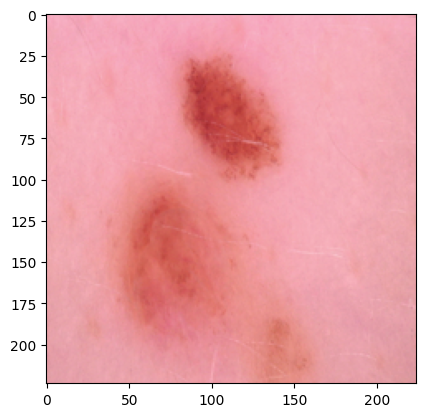

In [ ]:
#Display Benign
img = mpimg.imread('/content/train/benign/873.jpg')
imgplot = plt.imshow(img)
plt.show

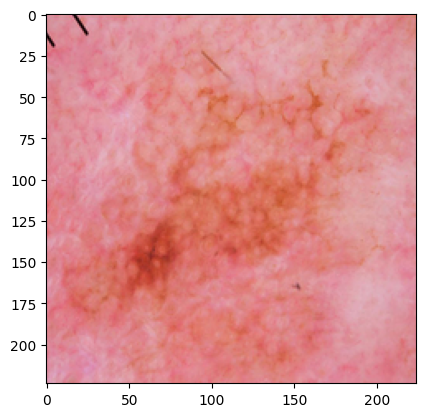

In [ ]:
#Display malignant
img2 = mpimg.imread('train/malignant/1002.jpg')
imgplot = plt.imshow(img2)
plt.show()

Image Preprocessing

In [ ]:
#Resize the images
#The dataset already have images in 224x224 size.

In [ ]:
#Convert images to numpy array

In [ ]:
def load_images_and_labels(base_dir):
    categories = ['benign', 'malignant']
    data = []
    labels = []

    for category in categories:
        folder = os.path.join(base_dir, category)
        label = 1 if category == 'malignant' else 0

        for filename in os.listdir(folder):
            if filename.endswith('.jpg'):
                file_path = os.path.join(folder, filename)
                # Load the image
                image = Image.open(file_path).resize((224, 224))
                image_array = np.array(image)
                data.append(image_array)
                labels.append(label)

    return np.array(data), np.array(labels)

# Load images and labels for train and test sets
X_train, y_train = load_images_and_labels('/content/train')
X_test, y_test = load_images_and_labels('/content/test')

# Check shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2637, 224, 224, 3) (2637,)
(660, 224, 224, 3) (660,)


array([[[247, 169, 169],
        [247, 167, 170],
        [248, 180, 181],
        ...,
        [246, 177, 182],
        [248, 177, 181],
        [248, 182, 184]],

       [[246, 164, 170],
        [248, 166, 172],
        [247, 179, 180],
        ...,
        [248, 177, 181],
        [248, 177, 183],
        [250, 181, 186]],

       [[245, 165, 166],
        [247, 171, 175],
        [247, 173, 174],
        ...,
        [247, 176, 180],
        [247, 176, 180],
        [248, 177, 181]],

       ...,

       [[231, 148, 142],
        [232, 149, 141],
        [235, 150, 145],
        ...,
        [242, 164, 162],
        [239, 161, 159],
        [237, 163, 154]],

       [[231, 146, 141],
        [232, 149, 141],
        [231, 151, 144],
        ...,
        [238, 163, 160],
        [236, 161, 156],
        [236, 161, 155]],

       [[228, 144, 142],
        [231, 146, 143],
        [233, 150, 146],
        ...,
        [240, 163, 157],
        [239, 162, 156],
        [239, 162, 156]]], dtype=uint8)
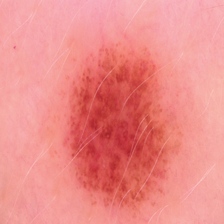

In [ ]:
X_train[5]

In [ ]:
#Train test split is not neccessary since the folders already have the trained and test data

In [ ]:
#Scale the data
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train)

[[[[0.78431373 0.40784314 0.45098039]
   [0.77647059 0.37254902 0.43921569]
   [0.77647059 0.4        0.45490196]
   ...
   [0.81960784 0.48235294 0.51764706]
   [0.83137255 0.4745098  0.50980392]
   [0.85490196 0.50196078 0.5372549 ]]

  [[0.75686275 0.39215686 0.43529412]
   [0.76078431 0.39215686 0.44705882]
   [0.77647059 0.38431373 0.43137255]
   ...
   [0.83529412 0.48235294 0.52941176]
   [0.82352941 0.47058824 0.50980392]
   [0.82352941 0.48235294 0.51764706]]

  [[0.75294118 0.38039216 0.41176471]
   [0.76862745 0.38823529 0.43137255]
   [0.75294118 0.37254902 0.40784314]
   ...
   [0.83921569 0.47058824 0.53333333]
   [0.82352941 0.4627451  0.52156863]
   [0.83137255 0.47843137 0.51764706]]

  ...

  [[0.72941176 0.37647059 0.38431373]
   [0.71372549 0.39215686 0.40784314]
   [0.71372549 0.38039216 0.39215686]
   ...
   [0.77254902 0.44313725 0.43529412]
   [0.78823529 0.4745098  0.47843137]
   [0.77647059 0.47843137 0.47843137]]

  [[0.73333333 0.37254902 0.37647059]
   [0.7

Building the Neural Network - Pre Trained Model MobileNet

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from keras.models import Sequential

In [ ]:
mobilenet_model_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

In [ ]:
pretrained_model = hub.KerasLayer(mobilenet_model_url,input_shape=(224,224,3),trainable=False)

In [ ]:
num_of_classes = 2

In [ ]:
model = tf.keras.Sequential()
model.add(pretrained_model)
model.add(layers.Dense(num_of_classes))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,),
              metrics=['acc']
)

In [ ]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
83/83 [==============================] - 127s 1s/step - loss: 0.4703 - acc: 0.7679
Epoch 2/5
83/83 [==============================] - 112s 1s/step - loss: 0.3499 - acc: 0.8426
Epoch 3/5
83/83 [==============================] - 115s 1s/step - loss: 0.3124 - acc: 0.8567
Epoch 4/5
83/83 [==============================] - 108s 1s/step - loss: 0.2937 - acc: 0.8733
Epoch 5/5
83/83 [==============================] - 106s 1s/step - loss: 0.2793 - acc: 0.8790


In [ ]:
score,acc=model.evaluate(X_test,y_test)

21/21 [==============================] - 28s 1s/step - loss: 0.3358 - acc: 0.8530


In [ ]:
print('Test Loss',score)
print('Test Accuracy',acc)

Test Loss 0.33583304286003113
Test Accuracy 0.8530303239822388


Prediction

Path of the image to be predicted/content/Malignant_test_picture.jpg


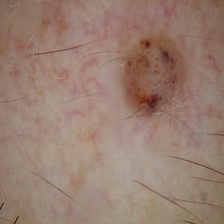

1/1 [==============================] - 1s 721ms/step
Predicted class: Benign
[[-0.06185324 -1.4429657 ]]


In [ ]:
import cv2

input_image_path = input('Path of the image to be predicted')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (224, 224))
input_image_scaled = input_image_resized / 255
image_reshaped = np.expand_dims(input_image_scaled, axis=0)
prediction = model.predict(image_reshaped)
predicted_class = np.argmax(prediction)
if predicted_class == 0:
    print('Predicted class: Benign')
elif predicted_class == 1:
    print('Predicted class: Malignant')

print(prediction)

In [ ]:
# Make predictions on the test set
y_pred_logits = model.predict(X_test)
y_pred = np.argmax(y_pred_logits, axis=1)


21/21 [==============================] - 27s 1s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))


              precision    recall  f1-score   support

      Benign       0.89      0.84      0.86       360
   Malignant       0.82      0.87      0.84       300

    accuracy                           0.85       660
   macro avg       0.85      0.85      0.85       660
weighted avg       0.86      0.85      0.85       660



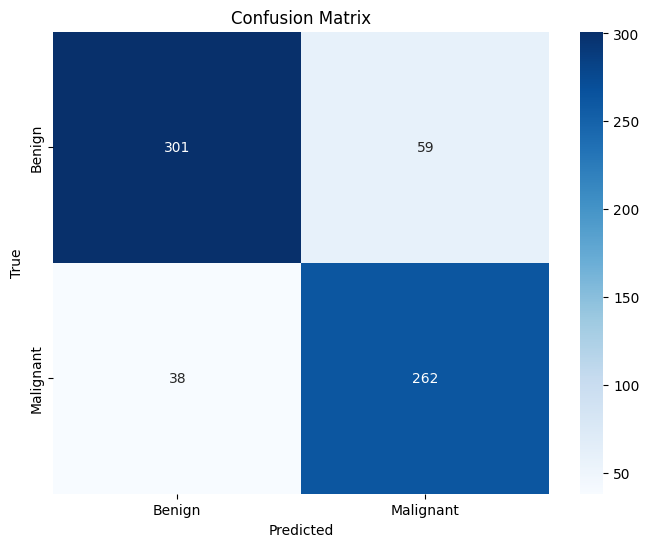

In [ ]:
# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(model,open(filename,'wb'))

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))

TypeError: The added layer must be an instance of class Layer. Received: layer=KerasLayer of type <class 'str'>.

In [ ]:
# Save the model
model.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
import tensorflow_hub as hub

# Load the model
loaded_model = load_model('trained_model.h5', custom_objects={'KerasLayer': hub.KerasLayer})


Path of the image to be predicted/content/benign_test_case.jpg


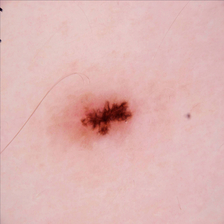

1/1 [==============================] - 0s 67ms/step
Predicted class: Benign
[[ 0.8278179 -0.7430014]]


In [ ]:
import cv2

input_image_path = input('Path of the image to be predicted')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (224, 224))
input_image_scaled = input_image_resized / 255
image_reshaped = np.expand_dims(input_image_scaled, axis=0)
prediction = loaded_model.predict(image_reshaped)
predicted_class = np.argmax(prediction)
if predicted_class == 0:
    print('Predicted class: Benign')
elif predicted_class == 1:
    print('Predicted class: Malignant')

print(prediction)